In [38]:
from fastai.imports import *
from fastai.torch_imports import *
from fastai.column_data import *
import torch.nn as nn

Generate synthetic data of x1^2 + x2^2 function with random noise

In [60]:
input_range = np.arange(-1,1,.1)
x1,x2 = np.meshgrid(input_range, input_range) 
x1 = x1.reshape([-1,1])
x2 = x2.reshape([-1,1])
X =np.concatenate([x1,x2], axis=1)
Y = x1 * x1 + x2 * x2 + np.random.normal(.1)

Take out random 20% for validation set

In [61]:
shuff = np.random.permutation(len(X))
train_size = int(len(X) * 0.8)
train_idx = shuff[:train_size]
val_idx = shuff[train_size:]
trainX, trainY, valX, valY = X[train_idx], Y[train_idx], X[val_idx], Y[val_idx]


Use ArraysIndexDataset put arrays into datasets and create ModelData out of it

In [62]:
train_aid = ArraysIndexDataset(trainX, trainY, None)
val_aid = ArraysIndexDataset(valX, valY, None)
md = ModelData.from_dls('.', DataLoader(train_aid), DataLoader(val_aid))

Tiny neural net pytorch model (no .cuda() so I can run it on CPU)

In [69]:
mininet = nn.Sequential(
    nn.Linear(2, 4),
    nn.ReLU(),
    nn.Linear(4, 4),
    nn.ReLU(),
    nn.Linear(4, 1),
)

Create Learner for my model, need to wrap it in fastai BasicModel.
This allows me to use the learning rate finder

  0%|          | 0/320 [00:00<?, ?it/s]


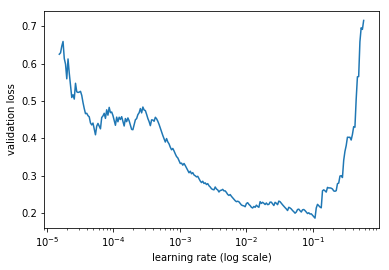

In [70]:
learn = Learner(md,BasicModel(mininet),crit=nn.MSELoss())
learn.lr_find()
learn.sched.plot()

And finally train with cyclical learning rate.

In [65]:
learn.fit(1e-2,2,cycle_len=2, cycle_mult=2)

epoch      trn_loss   val_loss         
    0      0.142903   0.161195  
    1      0.113764   0.143934         
    2      0.100934   0.107409         
    3      0.040086   0.037166         
    4      0.013631   0.016499         
    5      0.009658   0.013294         



[array([0.01329])]